In [1]:
import sys
import pandas as pd
import numpy as np
import time
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


# 2.1. Problem Statement: Numpy
## Problem Statement 1:
### Write a function so that the columns of the output matrix are powers of the input vector. The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.
#### HINT: Such a matrix with a geometric progression in each row is named for Alexandre-Theophile Vandermonde.

In [2]:
x = np.array(range(2,7))
N=4
np.column_stack([x**(N-1-i) for i in range(N)])

array([[  8,   4,   2,   1],
       [ 27,   9,   3,   1],
       [ 64,  16,   4,   1],
       [125,  25,   5,   1],
       [216,  36,   6,   1]], dtype=int32)

### Problem Statement 2:
##### Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows:
##### The moving average sequence has n-k+1 elements as shown below.
##### The moving averages with k=4 of a ten-value sequence (n=10) is shown below
##### i 1 2 3 4 5 6 7 8 9 10
##### ===== == == == == == == == == == ==
##### Input 10 20 30 40 50 60 70 80 90 100
##### y1 25 = (10+20+30+40)/4
##### y2 35 = (20+30+40+50)/4
##### y3 45 = (30+40+50+60)/4
##### y4 55 = (40+50+60+70)/4
##### y5 65 = (50+60+70+80)/4
##### y6 75 = (60+70+80+90)/4
##### y7 85 = (70+80+90+100)/4
#### Thus, the moving average sequence has n-k+1=10-4+1=7 values.
##### Question: Write a function to find moving average in an array over a window:
##### Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

In [3]:
sequence = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] 
def movingAverage(x,n):
    return np.convolve(sequence, np.ones((n,))/n, mode='valid')


movingAverage(np.array(sequence),3)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

# 2.2. Problem Statement: Pandas

##### 1) How-to-count-distance-to-the-previous-zero
##### For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position
##### Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
##### The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.
##### import pandas as pd
##### df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [4]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
df['Y']

0    1.0
1    2.0
2    0.0
3    1.0
4    2.0
5    3.0
6    4.0
7    0.0
8    1.0
9    2.0
Name: Y, dtype: float64

### 2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [5]:
datetimeIndex = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(datetimeIndex)), index=datetimeIndex)
print(datetimeIndex)
print(s)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=261, freq='B')
2015-01-01    0.976746
2015-01-02    0.668576
2015-01-05    0.391429
2015-01-06    0.806785
2015-01-07    0.234498
2015-01-08    0.225765
2015-01-09    0.091176
2015-01-12    0.487874
2015-01-13    0.797437
2015-01-14    0.358797
2015-01-15    0.747428
2015-01-16    0.312160
2015-01-19    0.901517
2015-01-20    0.525362
2015-01-21    0.048154
2015-01-22    0.682825
2015-01-23    0.145136
2015-01-26    0.664655
2015-01-27    0.385553
2015-01-28    0.883194
2015-01-29    0.515577
2015-01-30    0.055069
2015-02-02    0.823113
2015-02-03    0.57600

### 3) Find the sum of the values in s for every Wednesday

In [6]:
s[datetimeIndex.weekday == 2].sum() 

25.52310986525557

### 4) Average For each calendar month

In [7]:
s.resample('M').mean()

2015-01-31    0.495714
2015-02-28    0.544204
2015-03-31    0.524503
2015-04-30    0.508846
2015-05-31    0.547951
2015-06-30    0.452990
2015-07-31    0.468417
2015-08-31    0.513644
2015-09-30    0.595932
2015-10-31    0.531250
2015-11-30    0.581439
2015-12-31    0.590480
Freq: M, dtype: float64

## 5) For each group of four consecutive calendar months in s, 
## find the date on which the highest value occurred.

In [8]:
s.groupby(pd.Grouper(freq = '4M')).idxmax()

2015-01-31   2015-01-01
2015-05-31   2015-04-21
2015-09-30   2015-07-29
2016-01-31   2015-11-03
Freq: 4M, dtype: datetime64[ns]

## Problem Statement 2:
#### Read the dataset from the below link
### https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [9]:
babyNames = pd.read_csv('C://Users//tmutengwa//Documents//acadgild//US_Baby_Names_right.csv')
babyNames.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


### 1) Delete unnamed columns

In [10]:
babyNames.drop(babyNames.columns[babyNames.columns.str.contains('unnamed', case=False)],
          axis=1, inplace=True)

babyNames.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


## 2) Show the distribution of male and female

In [11]:
babyNames['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

## 3) Show the top 5 most preferred names

In [12]:
babyNames['Name'].value_counts()[:5].index.tolist()

['Riley', 'Avery', 'Jordan', 'Peyton', 'Hayden']

## 4) What is the median name occurrence in the dataset

In [13]:
babyNames['Name'].value_counts().median()

8.0

## 5) Distribution of male and female born count by states

In [14]:
babyNames.groupby('State')['Gender'].value_counts()

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

## 2.3. Problem Statement: Use Cases on Numpy and Pandas

### 1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:
#### Output:
##### 1) If the List element is a alphabet or string, the output will be
###### The entry is a
###### Oops! <class 'ValueError'> occured.
###### Next entry.
###### 2) If the List element is “0”,the output will be
###### The entry is 0
###### Oops! <class 'ZeroDivisionError'> occured.
###### Next entry.
###### 3) If the List element is and integer except 0,then output will be:
###### The entry is 2
###### The reciprocal of 2 is 0.5 // reciprocal of an integer

In [15]:
randomList = ['a', 0, 2]

for i in randomList:
    try:
        print("The entry is", i)
        #r = (np.reciprocal(randomList))
        r =1/float(i)
        break
    except:
        print("Oops!", sys.exc_info()[0], "occured.")
        print("Next entry.")
        
print("The reciprocal of" ,i, "is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.
The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.
The entry is 2
The reciprocal of 2 is 0.5


## 2) Array out of Bound Exception
### Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except)

In [16]:
x = np.arange(22,2,-1)
print(x)
try:
    print(x[np.array([4,11,13,21,23])])
except IndexError:
    print("Array index out of bounds")

[22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
Array index out of bounds


## 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.

#### The module created as fibo.py has to be placed in C:\Users\tmutengwa\Anaconda3\Lib

In [17]:
from fibo import fib2

x = fib2(1000)

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


## 4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [18]:
from Palindrome import isPalindrome

isPalindrome()

Enter string:motor
This is NOT a Palindrome String


## 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [19]:
# encrypt and decrypt a text using a simple algorithm of offsetting the letters

key = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

def encrypt(n, plaintext):
    """Encrypt the string and return the ciphertext"""
    result = ''

    for l in plaintext:
        try:
            i = (key.index(l) + n) % 26
            result += key[i]
        except ValueError:
            result += l

    return result

def decrypt(n, ciphertext):
    """Decrypt the string and return the plaintext"""
    result = ''

    for l in ciphertext:
        try:
            i = (key.index(l) - n) % 26
            result += key[i]
        except ValueError:
            result += l

    return result

text = input("enter string: ")
offset = int(input("enter offset number: "))


encrypted = encrypt(offset, text)
print('The encrypted string is:', encrypted)

decrypted = decrypt(offset, encrypted)
print('The decrypted string is:', decrypted)

enter string: Christonbank
enter offset number: 29
The encrypted string is: fkulvwrqedqn
The decrypted string is: christonbank


## 6) Get Data from the following link:
####  http://files.grouplens.org/datasets/movielens/ml-20m.zip
#### We will be using the following files for this exercise:
#### ratings.csv : userId,movieId,rating, timestamp
#### tags.csv : userId,movieId, tag, timestamp
#### movies.csv : movieId, title, genres

### I. Read the dataset using pandas.

In [20]:
ratings = pd.read_csv("C://Users//tmutengwa//Documents//acadgild//ml-20m//ratings.csv")
tags = pd.read_csv("C://Users//tmutengwa//Documents//acadgild//ml-20m//tags.csv")
movies = pd.read_csv("C://Users//tmutengwa//Documents//acadgild//ml-20m//movies.csv")

### II. Extract the first row from tags and print its type.

In [21]:
tags.iloc[:1]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [22]:
tags.iloc[:1].dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

### III. Extract row 0, 11, 2000 from tags DataFrame.

In [23]:
tags.iloc[[0, 11, 2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


### IV. Print index, columns of the DataFrame.

In [24]:
print(tags.index.values)
print(tags.columns.values)

[     0      1      2 ... 465561 465562 465563]
['userId' 'movieId' 'tag' 'timestamp']


### V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

In [25]:
ratings["rating"].mean()

3.5255285642993797

In [26]:
ratings["rating"].count()

20000263

In [27]:
ratings["rating"].max()

5.0

In [28]:
ratings["rating"].min()

0.5

In [29]:
ratings["rating"].median()

3.5

In [30]:
ratings["rating"].mode()

0    4.0
dtype: float64

In [31]:
ratings["rating"].std()

1.051988919275684

In [32]:
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

### VI. Filter out ratings with rating > 5

In [33]:
#ratings[ratings["rating"] > 5]
ratings[ratings["rating"] > 5].count()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [34]:
ratings[ratings["rating"] > 5]

,userId,movieId,rating,timestamp


### VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

In [35]:
ratings['rating'].isnull().sum()

0

### VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [36]:
movies[movies['genres']== 'Animation']

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation
13444,66335,Afro Samurai: Resurrection (2009),Animation
13858,69469,Garfield's Pet Force (2009),Animation
14184,71158,Immigrants (L.A. Dolce Vita) (2008),Animation
14492,72603,Merry Madagascar (2009),Animation
14578,72927,Donkey Xote (2007),Animation


### IX. Find the average rating of movies.

In [37]:
#ratings.groupby('movieId')['rating'].mean()
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [38]:
ratings.groupby('movieId')['rating'].mean()

movieId
1         3.921240
2         3.211977
3         3.151040
4         2.861393
5         3.064592
6         3.834930
7         3.366484
8         3.142049
9         3.004924
10        3.430029
11        3.667713
12        2.619766
13        3.272416
14        3.432082
15        2.721993
16        3.787455
17        3.968573
18        3.373631
19        2.607412
20        2.880754
21        3.581689
22        3.319400
23        3.148235
24        3.199849
25        3.689510
26        3.628857
27        3.413520
28        4.057546
29        3.952230
30        3.633880
            ...   
131146    4.000000
131148    4.000000
131150    4.000000
131152    0.500000
131154    3.500000
131156    4.000000
131158    4.000000
131160    4.000000
131162    2.000000
131164    4.000000
131166    4.000000
131168    3.500000
131170    3.500000
131172    1.000000
131174    3.500000
131176    4.500000
131180    2.500000
131231    3.500000
131237    3.000000
131239    4.000000
131241    4.000000
1312

### X. Perform an inner join of movies and tags based on movieId.

In [39]:
mightyMovies = movies.merge(tags,on='movieId',how='inner')
mightyMovies.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


### XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [40]:
md = movies.merge(ratings,on='movieId',how='inner')
md.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


### XII. Split 'genres' into multiple columns.

In [43]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
#split the genres into multiple rows
def Split(df, column, sep='|', keep=False):
    
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [45]:
movies = Split(movies,'genres')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


### XIII. Extract year from title e.g. (1995).

In [46]:
movies['Year']=movies['title'].str.extract('\((\d\d\d\d)\)')
movies['title'] = movies['title'].str[:-7]
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure,1995
0,1,Toy Story,Animation,1995
0,1,Toy Story,Children,1995
0,1,Toy Story,Comedy,1995
0,1,Toy Story,Fantasy,1995


### XIV. Select rows based on timestamps later than 2015-02-01.

In [47]:
new_ratings = ratings.merge(movies,left_on='movieId', right_on='movieId',how='inner')
new_ratings.head()

,userId,movieId,rating,timestamp,title,genres,Year
0,1,2,3.5,1112486027,Jumanji,Adventure,1995
1,1,2,3.5,1112486027,Jumanji,Children,1995
2,1,2,3.5,1112486027,Jumanji,Fantasy,1995
3,5,2,3.0,851527569,Jumanji,Adventure,1995
4,5,2,3.0,851527569,Jumanji,Children,1995


In [48]:
new_ratings['timestamp'] = ratings['timestamp'].apply(lambda x: time.strftime('%Y-%m-%d', time.localtime(x)))
new_ratings.head()

,userId,movieId,rating,timestamp,title,genres,Year
0,1,2,3.5,2005-04-03,Jumanji,Adventure,1995
1,1,2,3.5,2005-04-03,Jumanji,Children,1995
2,1,2,3.5,2005-04-03,Jumanji,Fantasy,1995
3,5,2,3.0,2005-04-03,Jumanji,Adventure,1995
4,5,2,3.0,2005-04-03,Jumanji,Children,1995


In [49]:
new_ratings.loc[new_ratings.timestamp > '2015-02-01' , :]

,userId,movieId,rating,timestamp,title,genres,Year
3534,7311,2,1.0,2015-02-24,Jumanji,Adventure,1995
3535,7311,2,1.0,2015-02-24,Jumanji,Children,1995
3536,7311,2,1.0,2015-02-24,Jumanji,Fantasy,1995
3537,7334,2,3.0,2015-02-25,Jumanji,Adventure,1995
3538,7334,2,3.0,2015-02-24,Jumanji,Children,1995
3539,7334,2,3.0,2015-02-25,Jumanji,Fantasy,1995
3540,7344,2,4.0,2015-02-25,Jumanji,Adventure,1995
3541,7344,2,4.0,2015-02-25,Jumanji,Children,1995
3542,7344,2,4.0,2015-02-24,Jumanji,Fantasy,1995
3543,7347,2,3.0,2015-02-24,Jumanji,Adventure,1995


# 2.4. Problem Statement: Matplotlib

## Matplotlib:
### This assignment is for visualization using matplotlib:
### data to use:
### url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
### titanic = pd.read_csv(url)

In [50]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [51]:
# get count of passengers by sex
sexCount = titanic['sex'].value_counts();sexCount

male      843
female    466
Name: sex, dtype: int64

### 1. Create a pie chart presenting the male/female proportion

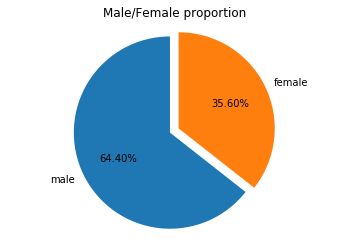

In [53]:
import matplotlib.pyplot as plt
Sex = ['male', 'female']
count = sexCount
explode = (0.0, 0.1)
plt.pie(count, explode = explode, labels=Sex, startangle=90, autopct='%.2f%%')
plt.axis('equal')
plt.title('Male/Female proportion')
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

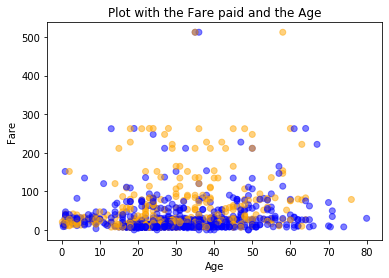

In [54]:
x, y = plt.subplots()
colorcode = {'male' : 'blue', 'female' : 'orange'}
titanic = titanic.dropna(subset=['sex'])
scatter_plot = plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c= titanic['sex'].map(colorcode))
plt.ylabel('Fare')
plt.xlabel('Age')
plt.title('Plot with the Fare paid and the Age')
plt.show()

# 2.5. Problem Statement: Data Cleaning

##### It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?
##### Take this monstrosity as the DataFrame to use in the following puzzles:
##### df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
###### 'Budapest_PaRis', 'Brussels_londOn'],
###### 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
###### 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
###### 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
###### '12. Air France', '"Swiss Air"']})

In [55]:
import numpy as np
import pandas as pd
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                   'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                   '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [56]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [57]:
N = df.From_To.str.split('_', expand = True)
N

,0,1
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [58]:
df[['From', 'To']] = df.From_To.str.split('_', expand = True)

In [59]:
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [60]:
N1 = df[['From','To']];N1

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [78]:
N1['From'] = df['From'].str.title()
N1['To'] = df['To'].str.title()
N1

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [61]:
df1 = df.drop('From_To', 1)

In [62]:
df1['From'] = N1['From']
df1['To'] = N1['To']
df1

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.
### Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [63]:
# Extract name of the airline 
df1['Airline'] = df1['Airline'].str.replace(r'[^a-zA-Z ]', '')

delays = pd.DataFrame(df1['RecentDelays'].values.tolist(), columns=['delay_1','delay_2','delay_3'])
delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [64]:
df1=pd.concat([df1, delays], axis=1, join_axes=[df1.index])
df1.drop(columns =["RecentDelays"], inplace = True)
df1

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,LoNDon,paris,23.0,47.0,NaN
1,10055,Air France,MAdrid,miLAN,NaN,NaN,NaN
2,10065,British Airways,londON,StockhOlm,24.0,43.0,87.0
3,10075,Air France,Budapest,PaRis,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,londOn,67.0,32.0,NaN


# 2.6. Problem Statement: Pandas SQL

### Problem statement 1:
##### Read the following data set:
###### https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
###### Rename the columns as per the description from this file:
###### https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [65]:
table = [pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)]
print(table)

[       0                  1       2              3   4   \
0      39          State-gov   77516      Bachelors  13   
1      50   Self-emp-not-inc   83311      Bachelors  13   
2      38            Private  215646        HS-grad   9   
3      53            Private  234721           11th   7   
4      28            Private  338409      Bachelors  13   
5      37            Private  284582        Masters  14   
6      49            Private  160187            9th   5   
7      52   Self-emp-not-inc  209642        HS-grad   9   
8      31            Private   45781        Masters  14   
9      42            Private  159449      Bachelors  13   
10     37            Private  280464   Some-college  10   
11     30          State-gov  141297      Bachelors  13   
12     23            Private  122272      Bachelors  13   
13     32            Private  205019     Assoc-acdm  12   
14     40            Private  121772      Assoc-voc  11   
15     34            Private  245487        7th-8th   4

In [66]:
db = sqlite3.connect('sqladb.db')
c = db.cursor()

In [67]:
c.execute("""CREATE TABLE adult (
age   int,
workclass   varchar(40),
fnlwgt   int,
education   varchar(40),
education_num   int,
marital_status   varchar(40),
occupation   varchar(20),
relationship   varchar(40),
race   varchar(20),
sex   varchar(10),
capital_gain   int,
capital_loss   int,
hours_per_week   int,
native_country   varchar(50),
income    varchar(10))
""")

In [68]:
db.commit()

### 1. Select 10 records from the adult sqladb

In [69]:
for row in c.execute('SELECT * FROM adult LIMIT 10'):
    print(row)

(50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K')
(38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K')
(53, 'Private', 234721, '11th', 7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K')
(28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 0, 0, 40, 'Cuba', '<=50K')
(37, 'Private', 284582, 'Masters', 14, 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K')
(49, 'Private', 160187, '9th', 5, 'Married-spouse-absent', 'Other-service', 'Not-in-family', 'Black', 'Female', 0, 0, 16, 'Jamaica', '<=50K')
(52, 'Self-emp-not-inc', 209642, 'HS-grad', 9, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 45, 'United-States', 

### 2. Show me the average hours per week of all men who are working in private sector2. Show me the average hours per week of all men who are working in private sector

In [70]:
for result in c.execute("SELECT AVG(hours_per_week) avg_hours_per_week FROM adult WHERE workclass = 'Private' AND sex = 'Male' "):
    print(result)

(42.22122591006424,)


### 3. Show me the frequency table for education, occupation and relationship, separately

In [71]:
for result in c.execute("SELECT education , COUNT(education) frequency FROM adult GROUP BY education "):
    print(result)

(None, 0)
('10th', 933)
('11th', 1175)
('12th', 433)
('1st-4th', 168)
('5th-6th', 333)
('7th-8th', 646)
('9th', 514)
('Assoc-acdm', 1067)
('Assoc-voc', 1382)
('Bachelors', 5354)
('Doctorate', 413)
('HS-grad', 10501)
('Masters', 1723)
('Preschool', 51)
('Prof-school', 576)
('Some-college', 7291)


In [72]:
for result in c.execute("SELECT occupation , COUNT(occupation) frequency FROM adult GROUP BY education "):
    print(result)

(None, 0)
('?', 933)
('Handlers-cleaners', 1175)
('Craft-repair', 433)
('?', 168)
('Machine-op-inspct', 333)
('Transport-moving', 646)
('Other-service', 514)
('Sales', 1067)
('Craft-repair', 1382)
('Exec-managerial', 5354)
('Prof-specialty', 413)
('Handlers-cleaners', 10501)
('Exec-managerial', 1723)
('Machine-op-inspct', 51)
('Prof-specialty', 576)
('Exec-managerial', 7291)


In [73]:
for result in c.execute("SELECT relationship , COUNT(relationship) frequency FROM adult GROUP BY education "):
    print(result)

(None, 0)
('Husband', 933)
('Husband', 1175)
('Not-in-family', 433)
('Not-in-family', 168)
('Husband', 333)
('Husband', 646)
('Not-in-family', 514)
('Not-in-family', 1067)
('Husband', 1382)
('Husband', 5354)
('Husband', 413)
('Not-in-family', 10501)
('Wife', 1723)
('Not-in-family', 51)
('Wife', 576)
('Husband', 7291)


### 4. Are there any people who are married, working in private sector and having a master’s degree

In [74]:
for result in c.execute("SELECT COUNT(*) FROM adult WHERE marital_status IN ('Married-civ-spouse', 'Married-spouse-absent' , 'Married-AF-spouse') AND workclass = 'Private' AND education = 'Masters' GROUP BY marital_status "):
    print(result)

(531,)
(9,)


### 5. What is the average, minimum and maximum age group for people working in different sectors

In [75]:
for result in c.execute(" SELECT workclass as sector, AVG(age) avg_Age, MIN(age) minAge, MAX(age) maxAge FROM adult GROUP BY workclass "):
    print(result)

(None, None, None, None)
('?', 40.960239651416124, 17, 90)
('Federal-gov', 42.590625, 17, 90)
('Local-gov', 41.75107501194458, 17, 90)
('Never-worked', 20.571428571428573, 17, 30)
('Private', 36.797585477617204, 17, 90)
('Self-emp-inc', 46.01702508960574, 17, 84)
('Self-emp-not-inc', 44.96969696969697, 17, 90)
('State-gov', 39.43639167309175, 17, 81)
('Without-pay', 47.785714285714285, 19, 72)


### 6. Calculate age distribution by country


In [76]:
for result in c.execute("SELECT native_country as country, AVG(age) Average ,MIN(age) Minimum ,MAX(age) Maximum FROM adult GROUP BY native_country"):
    print(result)

(None, None, None, None)
('?', 38.72555746140652, 17, 90)
('Cambodia', 37.78947368421053, 18, 65)
('Canada', 42.54545454545455, 17, 80)
('China', 42.53333333333333, 22, 75)
('Columbia', 39.71186440677966, 18, 75)
('Cuba', 45.76842105263158, 21, 82)
('Dominican-Republic', 37.72857142857143, 18, 78)
('Ecuador', 36.642857142857146, 21, 90)
('El-Salvador', 34.132075471698116, 17, 79)
('England', 41.15555555555556, 17, 90)
('France', 38.96551724137931, 20, 64)
('Germany', 39.25547445255474, 18, 74)
('Greece', 46.206896551724135, 22, 65)
('Guatemala', 32.421875, 19, 66)
('Haiti', 38.27272727272727, 17, 63)
('Holand-Netherlands', 32.0, 32, 32)
('Honduras', 33.84615384615385, 18, 58)
('Hong', 33.65, 19, 60)
('Hungary', 49.38461538461539, 24, 81)
('India', 38.09, 17, 61)
('Iran', 39.41860465116279, 22, 63)
('Ireland', 36.458333333333336, 23, 68)
('Italy', 46.42465753424658, 19, 77)
('Jamaica', 35.592592592592595, 18, 66)
('Japan', 38.24193548387097, 19, 61)
('Laos', 34.72222222222222, 19, 56)
(

### 7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss

In [77]:
for result in c.execute("SELECT workclass, occupation,(capital_gain - capital_loss) 'Net-Capital-Gain' FROM adult"):
    print(result)

('Self-emp-not-inc', 'Exec-managerial', 0)
('Private', 'Handlers-cleaners', 0)
('Private', 'Handlers-cleaners', 0)
('Private', 'Prof-specialty', 0)
('Private', 'Exec-managerial', 0)
('Private', 'Other-service', 0)
('Self-emp-not-inc', 'Exec-managerial', 0)
('Private', 'Prof-specialty', 14084)
('Private', 'Exec-managerial', 5178)
('Private', 'Exec-managerial', 0)
('State-gov', 'Prof-specialty', 0)
('Private', 'Adm-clerical', 0)
('Private', 'Sales', 0)
('Private', 'Craft-repair', 0)
('Private', 'Transport-moving', 0)
('Self-emp-not-inc', 'Farming-fishing', 0)
('Private', 'Machine-op-inspct', 0)
('Private', 'Sales', 0)
('Self-emp-not-inc', 'Exec-managerial', 0)
('Private', 'Prof-specialty', 0)
('Private', 'Other-service', 0)
('Federal-gov', 'Farming-fishing', 0)
('Private', 'Transport-moving', -2042)
('Private', 'Tech-support', 0)
('Local-gov', 'Tech-support', 0)
('Private', 'Craft-repair', 0)
('?', '?', 0)
('Private', 'Exec-managerial', 0)
('Private', 'Craft-repair', 0)
('Local-gov', 'Pr

In [78]:
db.close()

## Problem statement 2:
### Read the following data set:
### https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [79]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None);df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [81]:
df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')
df.to_sql('alchemynew', engine)

ValueError: Table 'alchemynew' already exists.

In [82]:
#update query
print(engine.execute('''UPDATE alchemynew SET income = '<30K'WHERE age=39 and workclass='
State-gov' and fnlwgt=77516 and education=' Bachelors' and educationNum=13'''))

In [83]:
#after updating the record
print(engine.execute('''SELECT * FROM alchemynew
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

[]


In [84]:
#update query2
print(engine.execute('''UPDATE alchemynew
SET income = '<30K'
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

In [85]:
#record after updating
print(engine.execute('''SELECT * FROM alchemynew
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[]


In [86]:
#deleting the record
print(engine.execute('''DELETE FROM alchemynew
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

In [87]:
#after deleting record is empty
print(engine.execute('''SELECT * FROM alchemynew
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

[]


In [88]:
#deleting the record
print(engine.execute('''DELETE FROM alchemynew
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

In [89]:
print(engine.execute('''SELECT * FROM alchemynew
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[]


In [90]:
#fitler query using LIke
print(engine.execute('''SELECT * FROM alchemynew WHERE race LIKE ' %Asian%' ''').fetchall())

[(11, 30, ' State-gov', 141297, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' India', ' >50K'), (14, 40, ' Private', 121772, ' Assoc-voc', 11, ' Married-civ-spouse', ' Craft-repair', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' ?', ' >50K'), (27, 54, ' ?', 180211, ' Some-college', 10, ' Married-civ-spouse', ' ?', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 60, ' South', ' >50K'), (93, 30, ' Private', 117747, ' HS-grad', 9, ' Married-civ-spouse', ' Sales', ' Wife', ' Asian-Pac-Islander', ' Female', 0, 1573, 35, ' ?', ' <=50K'), (139, 49, ' Private', 81973, ' Some-college', 10, ' Married-civ-spouse', ' Craft-repair', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' United-States', ' >50K'), (152, 33, ' Private', 163003, ' Bachelors', 13, ' Never-married', ' Exec-managerial', ' Other-relative', ' Asian-Pac-Islander', ' Female', 0, 0, 40, ' Philippines', ' <=50K'), (162, 44, ' Self-emp-inc', 78374

In [91]:
#fliter query using IN
print(engine.execute('''SELECT * FROM alchemynew WHERE age  IN(30, 40) ''').fetchall())

[(11, 30, ' State-gov', 141297, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' India', ' >50K'), (14, 40, ' Private', 121772, ' Assoc-voc', 11, ' Married-civ-spouse', ' Craft-repair', ' Husband', ' Asian-Pac-Islander', ' Male', 0, 0, 40, ' ?', ' >50K'), (20, 40, ' Private', 193524, ' Doctorate', 16, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 60, ' United-States', ' >50K'), (33, 30, ' Federal-gov', 59951, ' Some-college', 10, ' Married-civ-spouse', ' Adm-clerical', ' Own-child', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (59, 30, ' Private', 188146, ' HS-grad', 9, ' Married-civ-spouse', ' Machine-op-inspct', ' Husband', ' White', ' Male', 5013, 0, 40, ' United-States', ' <=50K'), (60, 30, ' Private', 59496, ' Bachelors', 13, ' Married-civ-spouse', ' Sales', ' Husband', ' White', ' Male', 2407, 0, 40, ' United-States', ' <=50K'), (76, 40, ' Private', 32214, ' Assoc-acdm

In [92]:
#using LENGTH function
print(engine.execute('''SELECT * FROM alchemynew
WHERE LENGTH(workclass)>16 ''').fetchall())

[(1, 50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K'), (7, 52, ' Self-emp-not-inc', 209642, ' HS-grad', 9, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 45, ' United-States', ' >50K'), (16, 25, ' Self-emp-not-inc', 176756, ' HS-grad', 9, ' Never-married', ' Farming-fishing', ' Own-child', ' White', ' Male', 0, 0, 35, ' United-States', ' <=50K'), (19, 43, ' Self-emp-not-inc', 292175, ' Masters', 14, ' Divorced', ' Exec-managerial', ' Unmarried', ' White', ' Female', 0, 0, 45, ' United-States', ' >50K'), (39, 48, ' Self-emp-not-inc', 265477, ' Assoc-acdm', 12, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (41, 53, ' Self-emp-not-inc', 88506, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Husband', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (72, 29, 

In [93]:
#using Upper function
print(engine.execute('''SELECT sex,upper(sex) FROM alchemynew
WHERE LENGTH(workclass)==10 ''').fetchall())

[(' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Male', ' MALE'), (' Male', ' MALE'), (' Female', ' FEMALE'), (' Female', ' FEMALE'), (' 

In [8]:
import os
os.getcwd()

'C:\\Users\\tmutengwa'